<h1 align="center">Neural Networks and PyBrain</h3> 

<h3>What is a Neural Network ?</h3><br/>
Neural Networks are a family of Machine Learning algorithms that are modelled based on the way, a human brain solves problems. The biological neurons are modelled as  neural units and the axons as connections between them. Modern neural network projects work with typically few thousand to few million neural units and millions of connections. The long term goal of neural networks development can be perceived to lead to autonomous machine intelligence. Current day applications include but not limited to character recognition, image compression, stock market prediction, medicine, security and lot more...

<h3>How is it useful for Data Science ?</h3><br/>
Being able to extract hidden patterns from data is a key ability for a data scientist and neural network methods could be highly useful for extracting patterns from image, video and speech. Some of the applications could be autonomous driving, scheduling payloads for a space shuttle, predicting exchange rates, recognizing genes in uncharacterized DNA sequences, etc.,

<h3>Tutorial Content</h3>
1. <a href='#Section_1'>Working with Neural Networks</a>
    * <a href='#SubSection_1'>Components</a>
    * <a href='#SubSection_2'>Prediction and training</a>
    * <a href='#SubSection_3'>Types of neural network</a>
    * <a href='#SubSection_4'>Parameters to tune a neural network</a>
2. <a href='#Section_2'>Basic Example</a><br/>
3. <a href='#Section_3'>PyBrain</a>
    * <a href='#SubSection_5'>Installation</a>
    * <a href='#SubSection_6'>MNIST using PyBrain</a>
4. <a href='#Section_4'>Other famous Neural network libraries for PyBrain</a><br/>
5. <a href='#Section_5'>Advanced Reading</a><br/>
6. <a href='#Section_6'>References</a><br/>

<h3><a id='Section_1'>1. Working with Neural networks</a></h3>

<a id='SubSection_1'></a>
For any given neural network, following are the main components:<br/>
1. __Input Layer__ : Potential descriptive factors input to the neural network that are helpful for prediction<br/>
2. __Hidden Layer__: These are the actual calculation layers that have activation functions attached for each neuron in the layer. Number of layers and number of neurons in the each layer is defined by the user and effects the prediction efficiency of the neural net. Each node in a hidden layer can be visualized as an activation function that takes input from previous layer and provides output to the next layer. Common choices for the activation function are tanh, sigmoid or ReLUs<br/>
3. __Output Layer__: This is the layer that provides predicted output. Usually, number of nodes in an output layer is equal to the number of classes into which a prediction can go into. For example, prediction of the US presidential elections result can take 0/1 outcome. This implies, we can have 2 nodes in our output layer<br/>
4. __Weights__     : Each neuron in a given layer could be potentially connected to every neuron in adjacent layers (Fully connected) - the weight sets the importance of this link. Each connection between layers can be visualized to be a weight<br/>

<a id='SubSection_2'></a>
Prediction and training:
1. __Feed forward__    : This is the basic phase of processing one observation at a time to calculate the prediction using the weights already assigned. Then, the error can be calculated between the predicted and actual outcome
2. __Back Propagation__: On top of the feed forward network, if we take the error calculated between predicted and actual outcome, back through the network to adjust the individual weights to better reflect the actual outcome, the algorithm is called back propagation. These new weights are then used for the prediction of next observation

<a id='SubSection_3'></a>
Types of Neural Network:<br/>
1. __Single Layer Perceptron__ : Simple feedforward network with no hidden layers. This can only learn linear functions
2. __Multi Layer Perceptron__  : Can contain one or more hidden layers. This is more useful than a single layer perceptron in the sense that it can learn non-linear functions

<a id='SubSection_4'></a>
Parameters to tune a neural network:
1. __Learning rate__ : Rate at which the network reacts to new observations
2. __Topology__      : Design of the network - number of hidden layers and number of neural units per layer
3. __Dropout rate__  : Neurons and their connections are dropped at this rate to take care of overfitting & slow speed of training

<h3><a id='Section_2'>2. Basic Example</a></h3>

Let's look at an example now...<br/><br/>
Since US presidential elections is a hot topic currently, let's knit a very basic example around it. Let us assume that we have 150 samples of data about two features - Fame on twitter and Fame on facebook for Hillary and Trump. And we want to predict who the candidate could be, given a pair of fame values for a new data sample. For each day, we have a tuple of values each for Hillary and Trump. Let us make up a random data to work on. Below code generates 150 random data samples for each candidate, with x-axis having fame on twitter and y-axis having fame on facebook. Let's assume, the plot below shows data samples of Hillary in Blue and that of Trump in Red.

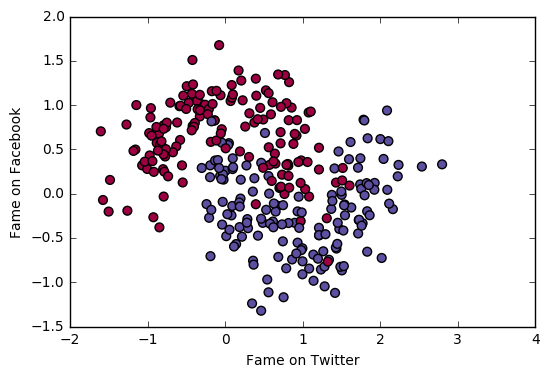

In [27]:
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt

# Generate a random data set and visualize the data
np.random.seed(0)
X, y = sklearn.datasets.make_moons(300, noise=0.3)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.xlabel('Fame on Twitter')
plt.ylabel('Fame on Facebook')
plt.show()

To solve this problem, let us build a simple 3-layer network - one input, one hidden and one output layer. Number of neural units in input layer is defined by dimentionality of our data (it's 2 in our case). On similar lines, the number of nodes in the output layer is determined by the number of classes our output can be predicted into (which is also 2 in our case). Though we are free to choose the number of hidden layers and the number of nodes in each layer, one must keep in mind that increasing the number of nodes increases the computation power required in training the model and also predicting the outcome. Also, large number of parameters can make our model prone to overfitting. That being said, let's pick the number of nodes in our hidden layer to be 5, which makes our neural network look like the one below.

<img src="http://d3kbpzbmcynnmx.cloudfront.net/wp-content/uploads/2015/09/nn-from-scratch-3-layer-network-1024x693.png" width="400" height="400">

Now that we have choosen the topology of our neural network, lets continue with representing it with mathematical equations. (Let's pick tanh as our activation function)

$$z_1 = xW_1 + b_1$$
$$a_1 = tanh(z_1)$$
$$z_2 = a_1W_1 + b_2$$
$$a_2 = \hat{y} = softmax(z_2)$$

Here, $x$ can be assumed to be input from Input1 and the bias term, having value '1' is assumed to be from Input2. The weights for connections coming from these inputs are $W_1$ and $b_1$ respectively. This sums up to give $z_1$ as input for each of the node in the hidden layer. Each node processes the input with the activation function and gives out $a_1$ as the output. Connections between the hidden layer and output layer can be visualize on similar lines.

Let's go ahead to implement the above neural network.
To start with, initialize some parameters useful to build the model

In [7]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
 
# Gradient descent parameters (randomly picked)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

Building the model involves:<br/>
* Initializing the parameters to be learnt to some random values
* Repeating forward & backward propagation until loss becomes constant/unchanging. For this, we use gradient descent for updating weight values after each backpropagation stage

In [10]:
def build_model(nn_hdim, nIters=20000, print_loss=False):
    '''
    This function learns parameters for the neural network and returns the model.
      - nn_hdim: Number of nodes in the hidden layer
      - nIters: Number of iterations through the training data for gradient descent
      - print_loss: If True, print the loss every 1000 iterations
    '''
     
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
 
    # This is what we return at the end
    model = {}
     
    # Gradient descent. For each batch...
    for i in xrange(0, nIters):
 
        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
 
        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
 
        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
 
        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
         
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
         
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
          print "Loss after iteration %i: %f" %(i, calculate_loss(model))
     
    return model

# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

Let's create and train our neural network with 5 nodes in the hidden layer.

In [11]:
model = build_model(5, print_loss=True)

Loss after iteration 0: 0.872819
Loss after iteration 1000: 0.160938
Loss after iteration 2000: 0.156943
Loss after iteration 3000: 0.155414
Loss after iteration 4000: 0.154775
Loss after iteration 5000: 0.154468
Loss after iteration 6000: 0.154301
Loss after iteration 7000: 0.154202
Loss after iteration 8000: 0.154138
Loss after iteration 9000: 0.154094
Loss after iteration 10000: 0.154063
Loss after iteration 11000: 0.154040
Loss after iteration 12000: 0.154023
Loss after iteration 13000: 0.154009
Loss after iteration 14000: 0.153998
Loss after iteration 15000: 0.153990
Loss after iteration 16000: 0.153982
Loss after iteration 17000: 0.153977
Loss after iteration 18000: 0.153972
Loss after iteration 19000: 0.153968


As you can see above, loss decreases across subsequent iterations, meaning that we are converging to parameters that can give a more accurate prediction. We can now predict some new observations with the following function.

In [13]:
# Prediction function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [33]:
print predict(model, np.array([[1,2]])) # Predicting for a new random test data sample

[0]


Finally, we can plot a decision boundary which can be thought of as a classifier line that divides data samples between two candidates. Given a new data sample, we can just make a prediction by looking on which side the sample lies, each side of the line indicating a candidate.

In [34]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

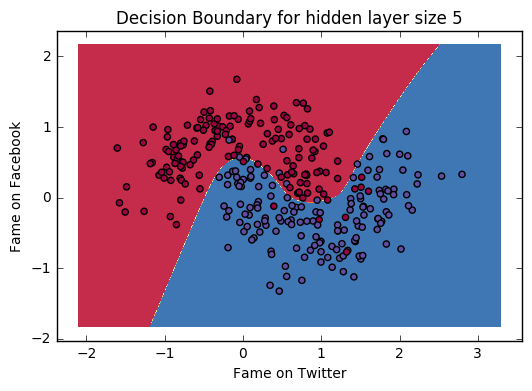

In [36]:
# Plot the decision boundary
plot_decision_boundary(lambda X: predict(model, X))
plt.title("Decision Boundary for hidden layer size 5")
plt.xlabel('Fame on Twitter')
plt.ylabel('Fame on Facebook')
plt.show()

Not always do we implement a neural network from scratch by ourselves. Fastest and easiest way to build a neural network is by using a well-written library. I chose to use PyBrain for this tutorial since it is well-written and also widely used.

<h3><a id='Section_3'>3. PyBrain</a></h3>

PyBrain is short for <b>Py</b>thon <b>B</b>ased <b>R</b>einforcement Learning, <b>A</b>rtificial <b>I</b>ntelligence and <b>N</b>eural Network Library. Its goal is to offer flexible, easy to use Machine Learning algorithms and predefined environments to make the task of testing and comparing your algorithms easy. It is one of the best python based libraries for building Neural networks. This tutorial helps you get started on PyBrain using one example which could be helpful to build any other neural network.<br/>

<a id='SubSection_5'>__Installation__</a><br/>
Getting started with PyBrain is very easy. Following one command directly installs PyBrain in anaconda environment.<br/>

    $ conda install --channel https://conda.anaconda.org/mq pybrain

If you want to install PyBrain out of Anaconda, you may follow the below steps that are provided in official website.

    $ git clone git://github.com/pybrain/pybrain.git pybrain
$ python setup.py install

Now that we have PyBrain installed, Let's quickly start by building a simple Neural network to understand the ease of working with PyBrain. We shall build a neural network with 3 inputs and 1 output with one hidden layer having 3 nodes.

In [20]:
from pybrain.tools.shortcuts import buildNetwork
net = buildNetwork(3, 3, 1)
print net

FeedForwardNetwork-29
   Modules:
    [<BiasUnit 'bias'>, <LinearLayer 'in'>, <SigmoidLayer 'hidden0'>, <LinearLayer 'out'>]
   Connections:
    [<FullConnection 'FullConnection-25': 'in' -> 'hidden0'>, <FullConnection 'FullConnection-26': 'hidden0' -> 'out'>, <FullConnection 'FullConnection-27': 'bias' -> 'out'>, <FullConnection 'FullConnection-28': 'bias' -> 'hidden0'>]



As you can see above, it is as simple as a function call with number of input, hidden and output layers. It can be seen that the output is a feedforward network of modules and connections. The net built above is already initialized with random values by default and ready to calculate a prediction output.

In [39]:
print net.activate([1, 2, 1])

[ 0.27128344]


Though the prediction doesn't much make any sense, the example was just intended to give a jump start.<br/>
Now that we have seen a very basic example of a neural network, lets implement something bigger, practical and useful to extend our understanding. For this purpose, let's take the MNIST data and classify hand written digits.

<h3><a id='SubSection_6'>MNIST using PyBrain</a></h3><br/>
Let's begin by loading the MNIST data .. (Please use the same data files from Lab4)

In [1]:
import numpy as np
import struct

def parse_images(filename):
    f = open(filename,"rb");
    magic,size = struct.unpack('>ii', f.read(8))
    sx,sy = struct.unpack('>ii', f.read(8))
    X = []
    for i in range(size):
        im =  struct.unpack('B'*(sx*sy), f.read(sx*sy))
        X.append([float(x)/255.0 for x in im]);
    return np.array(X);

def parse_labels(filename):
    f = open(filename,"rb");
    magic,size = struct.unpack('>ii', f.read(8))
    return np.array(struct.unpack('B'*size, f.read(size)))

X_train = parse_images("train-images-idx3-ubyte")
y_train = parse_labels("train-labels-idx1-ubyte")
X_test = parse_images("t10k-images-idx3-ubyte")
y_test = parse_labels("t10k-labels-idx1-ubyte")

One sample input from training data looks something like below:

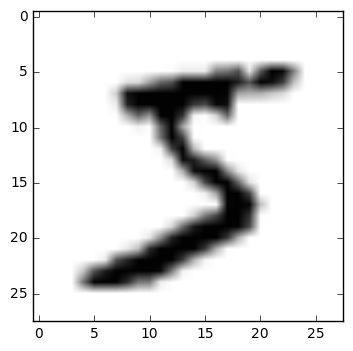

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
digits = np.reshape(X_train[0],(28,28)) 
                               
ax.imshow(255-digits, cmap=plt.get_cmap('gray'))

Lets import all functions from pybrain.structure and encapsulate the functions we require in a class. We will use this class to build, train and test a neural network for making predictions on MNIST data.<br/>(You may go through each of the function, as we go through each step towards making predictions on MNIST)

In [ ]:
from pybrain.structure import *
from pybrain.datasets.supervised import *
from pybrain.supervised.trainers import *
from pybrain.utilities import *

class MNIST_NN():
    def __init__(self, nInputs, hLayers, hNeurons, nOutputs):
        # Initialize the parameters to build a neural network
        self.nInputs  = nInputs
        self.hLayers  = hLayers
        self.hNeurons = hNeurons
        self.nOutputs = nOutputs
        
    def plotData(self, X, Y, c):
        fig, ax = plt.subplots()
        digits = np.reshape(X[c],(28,28))                        
        ax.imshow(255-digits, cmap=plt.get_cmap('gray'))
        print("true number is " + str(Y[c]))
        
    def build_network(self):
        # Layer structures
        inpLayer = LinearLayer(self.nInputs)
        h0Layer = SigmoidLayer(self.hNeurons)
        outLayer = SoftmaxLayer(self.nOutputs)
        
        # Create and add layers to network
        net = FeedForwardNetwork()
        net.addInputModule(inpLayer)
        net.addModule(h0Layer)
        net.addOutputModule(outLayer)
        
        # Define connections
        conn1 = FullConnection(inpLayer, h0Layer)
        conn2 = FullConnection(h0Layer, outLayer)
        
        # Add connections to the network
        net.addConnection(conn1)
        net.addConnection(conn2)
        
        # Arrange modules and connections into the network
        net.sortModules()
        self.net = net
    
    # Creates a one-hot matrix of output labels
    def one_hot(self, Y):
        Y = np.reshape(Y, (len(Y), -1))
        rows, cols = np.shape(Y)
        numLabels = 10
        Y2 = np.zeros((rows, numLabels))
        for i in range(0, rows):
            Y2[i, Y[i]] = 1
        return Y2
    
    # Processing the training data into the format required for PyBrain methods
    def process_inputs(self, X, Y):
        # Create an empty data set of PyBrain supervised dataset type
        dataTrain = SupervisedDataSet(self.nInputs, self.nOutputs)
        labels = self.one_hot(Y)
        
        # Populate the dataset with input data
        dataTrain.setField('input', X)
        dataTrain.setField('target', labels)
        self.dataTrain = dataTrain
    
    # Train the neural network with training data and given parameter values
    def train_NN(self, X_train, y_train, lr, mom, nEpochs=20):
        # Processing the input training data into format required for PyBrain methods
        self.process_inputs(X_train, y_train)
        
        # Choosing a basic back propagation trainer
        train = BackpropTrainer(self.net, dataset=self.dataTrain, learningrate=lr, momentum=mom)
        # Training for given number of Epochs/iterations
        train.trainEpochs(nEpochs)

    # Calculate and compare training errors for each iteration between training and test data
    def calculate_training_error(self, X_train, y_train, x, y, lr=0.1, mom=0.1, nEpochs=20):
        # Process the test data
        dataTest = SupervisedDataSet(self.nInputs, self.nOutputs)
        testLabels = self.one_hot(y)
        dataTest.setField('input', x)
        dataTest.setField('target', testLabels)
        
        # Process the training data
        self.process_inputs(X_train, y_train)
        
        # Store true/actual values of labels for each input
        trueTrain = self.dataTrain['target'].argmax(axis=1)
        trueTest = dataTest['target'].argmax(axis=1)
        
        # Instantiate the back propagation trainer
        train = BackpropTrainer(self.net, dataset=self.dataTrain, learningrate=lr, momentum=mom)
        
        # Train the network for given number of epochs, while calculating training error on both training and test
        # data for each epoch/iteration
        for i in range(0, nEpochs):
            train.trainEpochs(1)
            
            outTrain = self.net.activateOnDataset(self.dataTrain)
            outTrain = outTrain.argmax(axis=1)
            resTrain = 100 - percentError(outTrain, trueTrain)

            outTest = self.net.activateOnDataset(dataTest)
            outTest = outTest.argmax(axis=1)
            resTest = 100 - percentError(outTest, trueTest)

            print("epoch: %d " % train.totalepochs,"train acc: %.3f%% " % resTrain, "test acc: %.3f%%" % resTest)
            
    # Make prediction on a single input record/example
    def test_NN(self, X, Y):
        prediction = self.net.activate(X)
        #print(prediction)
        p = np.argmax(prediction, axis=0)
        print("predicted output is \t" + str(p))

First, lets instantiate the MNIST_NN. We are designing the network with following parameters:<br/>
    1. Number of nodes in input layer = Number of pixels in a single image
    2. Number of hidden layers = 1 (keeping it simpler. This can be increased at the expense of compute power)
    3. Number of nodes/neurons in hidden layer = Number of pixels in a single image
    4. Number of outputs/nodes in output layer = number of unique classes the output can be predicted into

In [ ]:
M0 = MNIST_NN(X_train.shape[1], 1, X_train.shape[1], len(np.unique(y_train)))

Now, lets build a neural network using the instance of this class. While building the network, we define the type of each layer - sigmoid/linear and type of connection - FullConnection/SharedConnection,etc.,

In [ ]:
M0.build_network()

Having built the network, we have random values of weights initialized already. We need to train the network to tune these weights to make an accurate prediction of a test input. Let's use the backpropagation algorithm and perform the training for 10 epochs.

In [ ]:
M0.train_NN(X_train[0:1000], y_train[0:1000], .1, .1, 10)

Now that we have trained the network, let's make a simple prediction and compare with actual/expected outcome. We just need to activate the net with test input to get the prediction. test_NN makes the prediction and plotData shows the actual image of the taken input.

predicted output is 	3
true number is 3


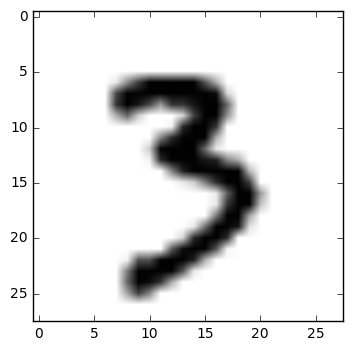

In [7]:
M0.test_NN(X_test[30], y_test[30])
M0.plotData(X_test, y_test, 30)

To get a sense of how the training of the net is actually happening through number of iterations, let's use the calculate_training_error function which calculates prediction error on train and test data across different epochs.

In [8]:
M1 = MNIST_NN(X_train.shape[1], 1, X_train.shape[1], len(np.unique(y_train)))
M1.build_network()
M1.calculate_training_error(X_train[0:1000], y_train[0:1000], X_test[0:40], y_test[0:40], nEpochs=10)

('epoch: 1 ', 'train acc: 85.600% ', 'test acc: 77.500%')
('epoch: 2 ', 'train acc: 87.000% ', 'test acc: 77.500%')
('epoch: 3 ', 'train acc: 96.700% ', 'test acc: 90.000%')
('epoch: 4 ', 'train acc: 95.700% ', 'test acc: 87.500%')
('epoch: 5 ', 'train acc: 98.000% ', 'test acc: 82.500%')
('epoch: 6 ', 'train acc: 96.200% ', 'test acc: 80.000%')
('epoch: 7 ', 'train acc: 99.500% ', 'test acc: 87.500%')
('epoch: 8 ', 'train acc: 99.800% ', 'test acc: 90.000%')
('epoch: 9 ', 'train acc: 100.000% ', 'test acc: 92.500%')
('epoch: 10 ', 'train acc: 100.000% ', 'test acc: 92.500%')


We could see the accuracy to be increasing till epoch-9 and then became constant, indicating convergence. Let's make a test prediction again, on some other test data sample with this trained model obtained. 

predicted output is 	0
true number is 0


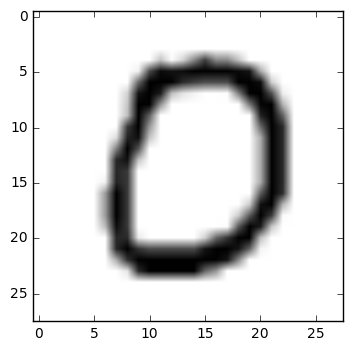

In [9]:
M1.test_NN(X_test[10], y_test[10])
M1.plotData(X_test, y_test, 10)

<h3><a id='Section_4'>4. Other famous Python libraries for Neural Networks</a></h3>
1. Theano (http://deeplearning.net/software/theano/)
2. Caffe (http://caffe.berkeleyvision.org/)
3. TensorFlow (https://www.tensorflow.org/)

<h3><a id='Section_5'>5. Advanced Reading</a></h3>
1. http://pybrain.org/docs/index.html#advanced
2. http://www.jmlr.org/papers/volume11/schaul10a/schaul10a.pdf
3. http://link.springer.com/chapter/10.1007/978-3-642-15534-5_5#page-1
4. http://corpocrat.com/2014/10/10/tutorial-pybrain-neural-network-for-classifying-olivetti-faces/
5. http://dl.acm.org/citation.cfm?id=573193
6. https://deeplearning4j.org/neuralnet-overview

<h3><a id='Section_6'>6. References</a></h3>
    * http://www.kdnuggets.com/2016/08/making-data-science-accessible-neural-networks.html
    * https://ujjwalkarn.me/2016/08/09/quick-intro-neural-networks/
    * http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
    * http://pybrain.org/